In [2]:
import os, cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [3]:
img_path="DATA_SPLIT/val/photos/tuberculosis-phone-0032.jpg"
annot_path="DATA_SPLIT/val/anotations/tuberculosis-phone-0032.csv"

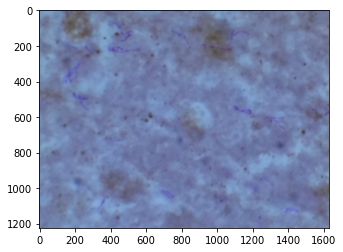

In [4]:
img=cv2.imread(img_path)
plt.imshow(img)
plt.show()

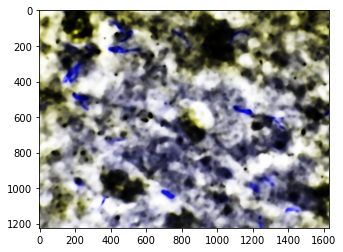

In [141]:
#img[:,:,1] = cv2.equalizeHist(img[:,:,2])
#img[:,:,0] = cv2.equalizeHist(img[:,:,0])
#img[:,:,2] = cv2.equalizeHist(img[:,:,1])
img=cv2.imread(img_path)
img=cv2.medianBlur(img,15)

img[:,:,1] = cv2.equalizeHist(img[:,:,1])
img[:,:,0] = cv2.equalizeHist(img[:,:,1])
img[:,:,2] = cv2.equalizeHist(img[:,:,2])



plt.imshow(img)
plt.show()

In [5]:
train_images=[]
train_labels=[]


ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()


image=photos[1]
df=pd.read_csv(annot_path)
gtvalues=[]
for row in df.iterrows():
    x1 = int(row[1][0].split(" ")[0])
    y1 = int(row[1][0].split(" ")[1])
    x2 = int(row[1][0].split(" ")[2])
    y2 = int(row[1][0].split(" ")[3])
    gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
ss.setBaseImage(image)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = image.copy()
counter = 0
falsecounter = 0
flag = 0
fflag = 0
bflag = 0


count_true=0
count_false=0
count=0
it=0

for e,result in enumerate(ssresults):
    it+=1
    if count_true<10:
        for gtval in gtvalues:
            x,y,w,h = result
            iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
            if count<30:
                if iou>0.6:
                    timage = imout[y:y+h,x:x+w]
                    resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                    train_images.append(resized)
                    train_labels.append(1)
                    count_true+=1
                    count+=1
                else:
                    if (count_false<20):
                        timage = imout[y:y+h,x:x+w]
                        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                        train_images.append(resized)
                        train_labels.append(0)
                        count_false += 1
                        count+=1





In [6]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

print(X_new.shape,y_new.shape)

(24, 224, 224, 3) (24,)


In [259]:
ssresults.shape

(7167, 4)

In [7]:
y_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1])

In [261]:
it

7167

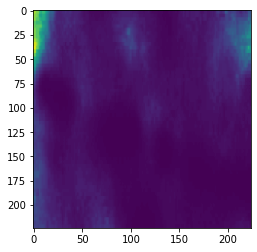

In [93]:
plt.imshow(X_new[28,:,:,2])
plt.show()

#Normalize image

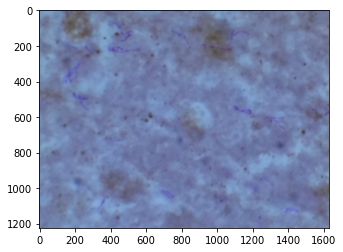

In [184]:
img=cv2.imread(img_path)
plt.imshow(img)
plt.show()

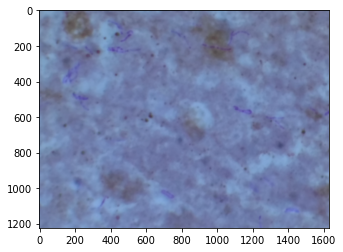

In [226]:
imge=cv2.imread(img_path)
imge=cv2.medianBlur(imge,5)
plt.imshow(imge)
plt.show()

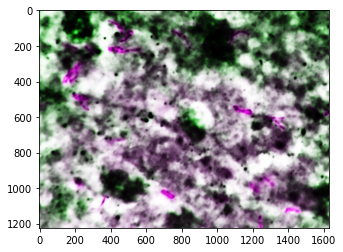

In [4]:
img=cv2.imread(img_path)
img=cv2.medianBlur(img,5)
img[:,:,0] = cv2.equalizeHist(img[:,:,2])
img[:,:,2] = cv2.equalizeHist(img[:,:,0])
img[:,:,1] = cv2.equalizeHist(img[:,:,1])

plt.imshow(img)
plt.show()

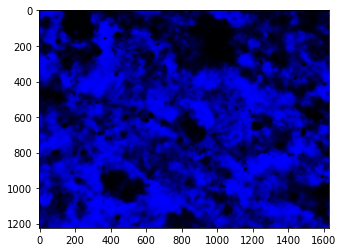

In [271]:
img=cv2.imread(img_path)
img=cv2.medianBlur(imge,5)
#img[:,:,0] = cv2.equalizeHist(img[:,:,2])
img[:,:,2] = cv2.equalizeHist(img[:,:,2])
img[:,:,0] = 0

img[:,:,1] = 0
img=img/255
plt.imshow(img)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

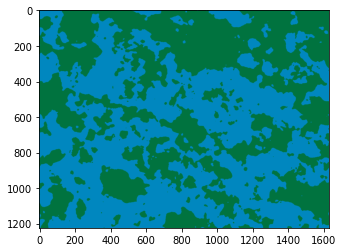

In [270]:
img_n= img.reshape(img.shape[0]*img.shape[1], img.shape[2])
kmeans = KMeans(n_clusters=2, random_state=0).fit(img_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_pic = pic2show.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(cluster_pic)

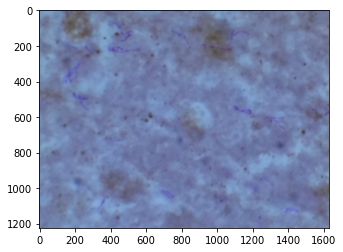

In [94]:
img=cv2.imread(img_path)



plt.imshow(img)
plt.show()

# grey Scale

In [ ]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage

In [90]:
gray=cv2.imread(img_path,0)
ret,thresh_global = cv2.threshold(gray,115,170,cv2.THRESH_BINARY)




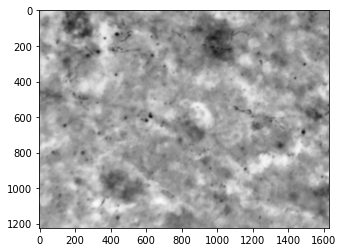

In [92]:
plt.imshow(gray,'gray')
plt.show()

### Threshold RGB channels

I am going to try make threshold in each channel of the image just so see if I can somehow make then bacillus pop out in the images with respect to the background. 

I do not really know which is the interval of color for the bacillus so we are going to implement selective search over the image and obtain both background and bacillus sections. After that we will calculate the mean value of segmented image and use that velue for thresholding.

In [5]:
img_path1="DATA_SPLIT/val/photos"
annot_path1="DATA_SPLIT/val/anotations"

In [69]:
X_new=np.load("X_new.npy")
y_new=np.load("y_new.npy")


In [70]:
print(X_new.shape,y_new.shape)

(31618, 224, 224, 3) (31618,)


In [58]:
for i in range(X_new.shape[0]):
    X_new[i,:,:,0] = cv2.equalizeHist(X_new[i,:,:,2])
    X_new[i,:,:,2] = cv2.equalizeHist(X_new[i,:,:,0])
    X_new[i,:,:,1] = cv2.equalizeHist(X_new[i,:,:,1])


In [71]:
index,=np.where(y_new==1)
index

array([   60,    61,    62, ..., 31555, 31556, 31557])

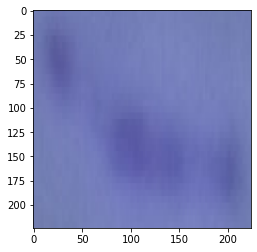

In [72]:
plt.imshow(X_new[index[26],])
plt.show()

In [73]:
color=[]
for i in range(index.size):
    av_row=np.average(X_new[index[i],],axis=0)
    av_color=np.average(av_row,axis=0)
    color.append(av_color)

    

In [74]:
color=np.array(color)

In [75]:
av_color_1=np.average(color,axis=0)

In [76]:
av_color_1

array([110.48966504, 118.89426255, 162.24512833])

Now repeat the process but for background

In [77]:
index_0,=np.where(y_new==0)
index_0.size

29100

In [78]:
index_0,=np.where(y_new==0)
color_0=[]

for i in range(index_0.size):
    av_row=np.average(X_new[index_0[i],],axis=0)
    av_color=np.average(av_row,axis=0)
    color_0.append(av_color)

color_0=np.array(color_0)
av_color_0=np.average(color_0,axis=0)

Thus, the average color threshold for bacillus will be av_color_1, whereas for background it will be av_color_0

In [79]:
av_color_0

array([110.7750035 , 114.17631903, 137.64530113])

In [80]:
av_color_1

array([110.48966504, 118.89426255, 162.24512833])

We can se both R and G values are pretty much the same for both. However, there is a significant difference in the blue channel.

In [51]:
img_path="DATA_SPLIT/val/photos/tuberculosis-phone-0032.jpg"
annot_path="DATA_SPLIT/val/anotations/tuberculosis-phone-0032.csv"

img=cv2.imread(img_path)


In [52]:
img.shape

(1224, 1632, 3)

In [81]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if(img[i,j,2]>180 & img[i,j,2]<130):
            img[i,j,2]=50
        if(img[i,j,2]>115):
            img[i,j,2]=0


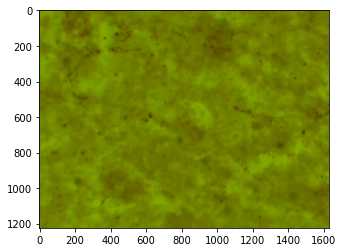

In [82]:
plt.imshow(img)
plt.show()

From now on let's take 4 photos


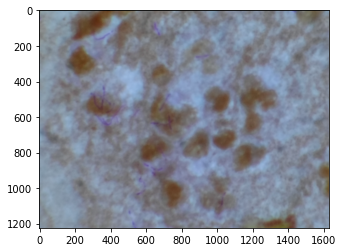

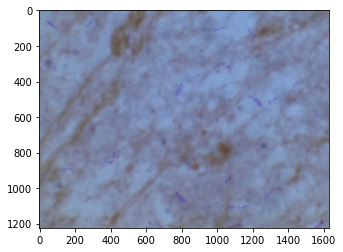

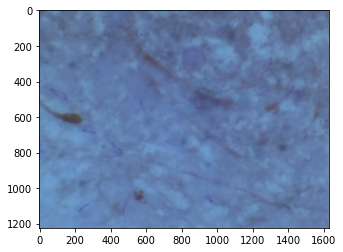

In [52]:
p1="DATA_SPLIT/val/photos/tuberculosis-phone-0006.jpg"
p2="DATA_SPLIT/val/photos/tuberculosis-phone-0015.jpg"
p3="DATA_SPLIT/val/photos/tuberculosis-phone-0111.jpg"

a1="DATA_SPLIT/val/anotations/tuberculosis-phone-0006.csv"
a2="DATA_SPLIT/val/anotations/tuberculosis-phone-0015.csv"
a3="DATA_SPLIT/val/anotations/tuberculosis-phone-0111.csv"

photos=[]
p=np.array([p1,p2,p3])
a=np.array([a1,a2,a3])

for i in range(3):
    photos.append(cv2.imread(p[i]))


for i in range(3):
    plt.imshow(photos[i])
    plt.show()

In [53]:
photos=np.array(photos)
photos.shape

(3, 1224, 1632, 3)

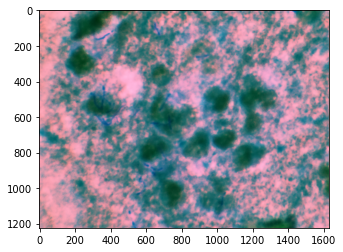

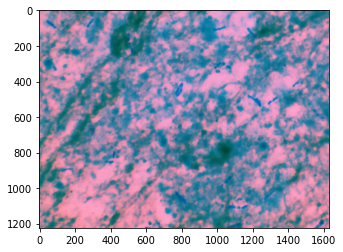

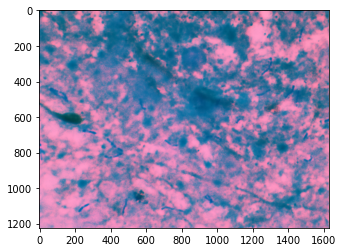

In [29]:
for i in range(3):
    photos[i,:,:,0]=cv2.equalizeHist(photos[i,:,:,0])
    plt.imshow(photos[i])
    plt.show()



In [12]:
train_images=[]
train_labels=[]


ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()


image=photos[2,:,:,:]
df=pd.read_csv(a[2])
gtvalues=[]
for row in df.iterrows():
    x1 = int(row[1][0].split(" ")[0])
    y1 = int(row[1][0].split(" ")[1])
    x2 = int(row[1][0].split(" ")[2])
    y2 = int(row[1][0].split(" ")[3])
    gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
ss.setBaseImage(image)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = image.copy()
counter = 0
falsecounter = 0
flag = 0
fflag = 0
bflag = 0


count_true=0
count_false=0
count=0
it=0

for e,result in enumerate(ssresults):
        for gtval in gtvalues:
            x,y,w,h = result
            iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
            if iou>0.6:
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                train_images.append(resized)
                train_labels.append(1)
                count_true+=1
                count+=1
            else:
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                train_images.append(resized)
                train_labels.append(0)
                count_false += 1
                count+=1



In [13]:
#X_iamges=np.array(train_images)
y_labels=np.array(train_labels)

In [9]:
y_labels

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
index=np.where(y_labels==1)
index

(array([ 35701,  48541,  74042,  84901,  90526,  95964, 100126, 123571,
        125206, 148950, 151355, 152281, 158490, 165376, 169304, 177905]),)

In [29]:
it

14165

A different pre processing approach

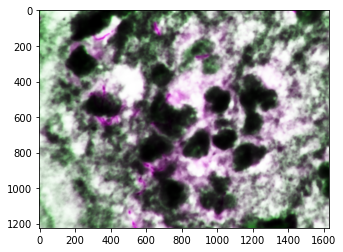

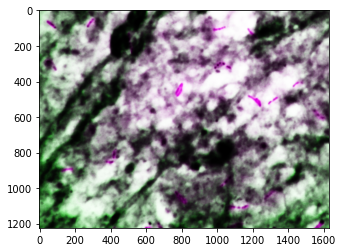

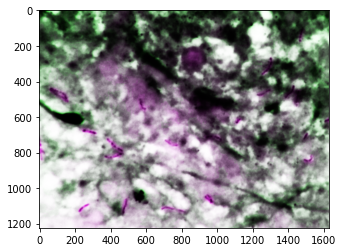

In [51]:
for i in range(3):
    photos[i]=cv2.medianBlur(photos[i],3)
    photos[i,:,:,0] = cv2.equalizeHist(photos[i,:,:,2])
    photos[i,:,:,2] = cv2.equalizeHist(photos[i,:,:,0])
    photos[i,:,:,1] = cv2.equalizeHist(photos[i,:,:,1])
    plt.imshow(photos[i])
    plt.show()

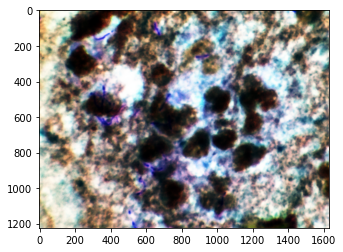

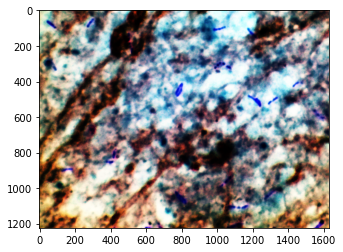

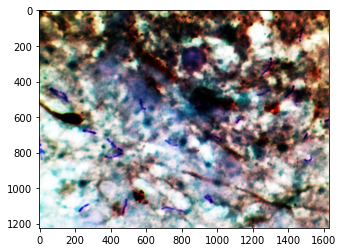

In [54]:
for i in range(3):
    photos[i]=cv2.medianBlur(photos[i],3)
    photos[i,:,:,0] = cv2.equalizeHist(photos[i,:,:,0])
    photos[i,:,:,1] = cv2.equalizeHist(photos[i,:,:,1])
    photos[i,:,:,2] = cv2.equalizeHist(photos[i,:,:,2])
    plt.imshow(photos[i])
    plt.show()

In [57]:
train_images=[]
train_labels=[]


ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()


image=photos[2,:,:,:]
df=pd.read_csv(a[2])
gtvalues=[]
for row in df.iterrows():
    x1 = int(row[1][0].split(" ")[0])
    y1 = int(row[1][0].split(" ")[1])
    x2 = int(row[1][0].split(" ")[2])
    y2 = int(row[1][0].split(" ")[3])
    gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
ss.setBaseImage(image)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = image.copy()
counter = 0
falsecounter = 0
flag = 0
fflag = 0
bflag = 0


count_true=0
count_false=0
count=0
it=0

for e,result in enumerate(ssresults):
        for gtval in gtvalues:
            x,y,w,h = result
            iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
            if iou>0.6:
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                train_images.append(resized)
                train_labels.append(1)
                count_true+=1
                count+=1
            else:
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                train_images.append(resized)
                train_labels.append(0)
                count_false += 1
                count+=1

train=np.array(train_labels)
index2=np.where(train==1)
index2=np.array(index2)
n2_eqfull=index2.shape[1]

In [20]:
print(n0,n1,n2)

11 10 9


In [26]:
print(n0_eq,n1_eq,n2_eq)

22 31 40


In [34]:
print(n0_0,n1_0,n2_0)

2 12 16


In [59]:
print(n0_eqfull,n1_eqfull,n2_eqfull)

16 36 25


In [32]:
import keras
model_final=keras.models.load_model('RCNN.h5')

2022-06-03 11:28:26.456449: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


SyntaxError: 'break' outside loop (1224340562.py, line 19)

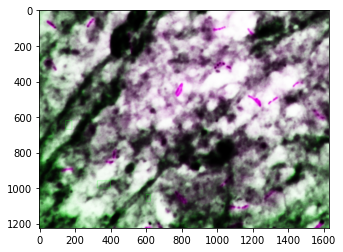

In [33]:
z=0

img = photos[1]
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = img.copy()
for e,result in enumerate(ssresults):
    if e < 2000:
        x,y,w,h = result
        timage = imout[y:y+h,x:x+w]
        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
        img = np.expand_dims(resized, axis=0)
        out= model_final.predict(img)
        if out[0][0] > 0.70:
            cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.figure()
plt.imshow(imout)

In [36]:
x=np.load("X_new.npy")
y=np.load("y_new.npy")

In [39]:
a=np.where(y==1)
a=np.array(a)
a.shape

(1, 2518)

In [46]:
index=np.random.randint(0,2518,2518)
index

array([ 134,  474,  469, ...,  981,  299, 2516])

In [47]:
x[index]

array([[[[128, 132, 185],
         [128, 132, 185],
         [128, 132, 185],
         ...,
         [129, 128, 178],
         [129, 128, 178],
         [129, 128, 178]],

        [[128, 132, 185],
         [128, 132, 185],
         [128, 132, 185],
         ...,
         [129, 128, 178],
         [129, 128, 178],
         [129, 128, 178]],

        [[126, 130, 183],
         [126, 130, 183],
         [125, 129, 182],
         ...,
         [128, 127, 177],
         [128, 127, 177],
         [128, 127, 177]],

        ...,

        [[132, 133, 183],
         [132, 133, 183],
         [132, 133, 183],
         ...,
         [128, 128, 176],
         [127, 127, 175],
         [127, 127, 175]],

        [[132, 133, 183],
         [132, 133, 183],
         [131, 132, 182],
         ...,
         [129, 129, 177],
         [128, 128, 176],
         [128, 128, 176]],

        [[132, 133, 183],
         [132, 133, 183],
         [131, 132, 182],
         ...,
         [129, 129, 177],
        